# Assignment 1 - Part A and B:

In Part A you will learn how to code Belief Propogation. For Part B you have to compare different landcover classification approaches. How to load the data is discussed in this notebook.

**PLEASE USE `scikit-learn` FOR ALL MACHINE LEARNING RELATED TASKS**

**YOU ARE ALWAYS REQUIRED TO SUBMIT THE CODE THAT YOU DEVELOPED ALONGSIDE THE COMPLETED ANSWER NOTEBOOK**

**You will also be required to report on all the contents of this notebook once completed, the results sould be in your report and well documented**

### Group Name:

### Student Number(s):


This notebook is divided into two parts. You will first be required to implement belief propogation.
You will then be expected to build a sequential classifier (and other classification models) which can discern between vegatation and settlement MODIS pixels.


# Part A: Belief Propogation


Implement a BPSK (Binary Phase Shift Keying) modulation scheme on an AWGN (Additive White Gaussian Noise) communication channel.

Use this implementation to plot the simulated BER curve associated with an uncoded BPSK AWGN channel.

Also plot the theoretical BER curve for a uncoded BPSK channel.

Now add a Hamming (7,4,3) code to the channel and decode it using belief propogation.

Also plot the BER curve of the coded BPSK AWGN channel.

_Make sure that the resulting curve is very smooth, otherwise marks will be deducted_


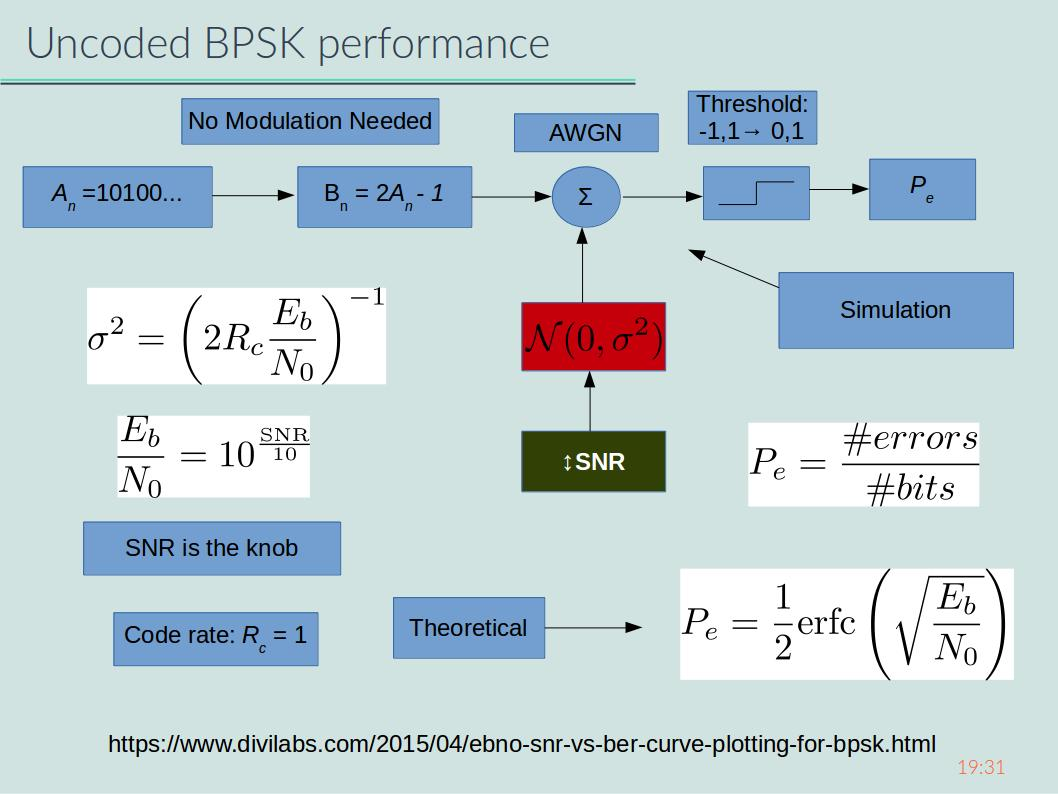

In [112]:
from IPython.display import Image
Image("./uncoded_BPSK.jpg")

Your plot should look similar to:


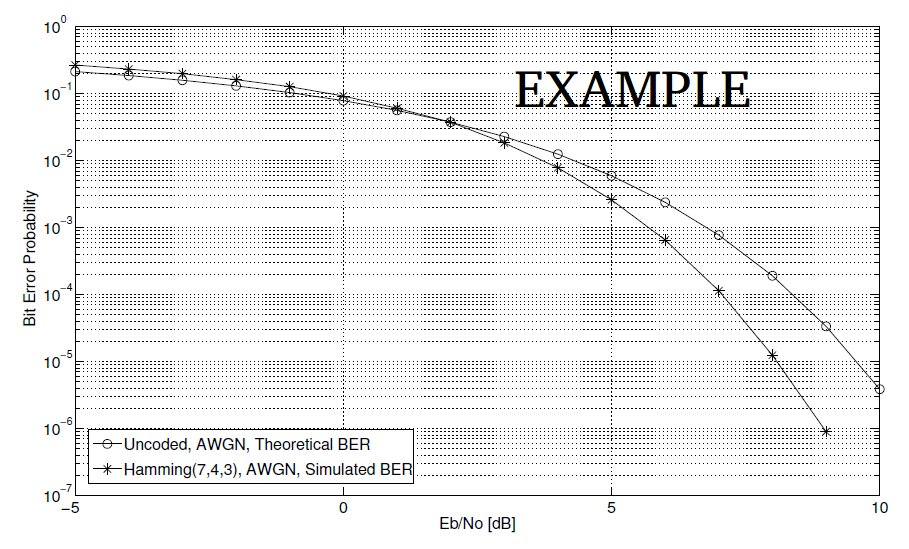

In [113]:
from IPython.display import Image
Image("./ber.jpg")

In [114]:
"""Code Here"""





'Code Here'

# Part B Remote Sensing - MODIS

How to load the dataset you will be using for part B of the assignment is discussed below.


In [115]:
import scipy.io
import pylab as plt
import numpy as np

## Plotting a random vegetation and settlement MODIS pixel


In [116]:
def plot_mat(name=""):
    mat = scipy.io.loadmat(name)
    print(mat.keys())
    veg_gauteng = mat['veg_gauteng']
          
    #(time,pixels,band)
    #(time,pixels,7) - NDVI
    print(veg_gauteng.shape)

    #(time,pixels,band)
    #(time,pixels,7) - NDVI
    bwt_gauteng = mat['bwt_gauteng']
    #bldg_gauteng = mat['bldg_gauteng']
    print(bwt_gauteng.shape)
                   
    #PLOT A SINGLE VEGETATION MODIS PIXEL (over all time and bands - except NDVI) 
    for k in range(7):
          plt.plot(veg_gauteng[:,0,k])
    plt.title("VEGETATION")
    plt.show()
          
    #PLOT A SINGLE SETTLEMENT MODIS PIXEL (over all time and bands - except NDVI) 
    for k in range(7):
        plt.plot(bwt_gauteng[:,0,k])

    plt.title("SETTLEMENT") 
    plt.show()      

## Load the data set


In this part of the assignment you will be required to train a time-varying MODIS classification model. You will then use the SPRT algorithm and the trained time-varying model to perform sequential classification of MODIS time-series. You will also implement a Naive Bayes classifier and a Logistic Regression classifier that takes as input the MODIS data after having performed dimensionality reduction on it. In the end you will compare the efficacy of the different classification algorithms with one another. Your main task is to discern between vegetation and settlement pixels. Below we plot a random MODIS vegetation and settlement pixel.


dict_keys(['__header__', '__version__', '__globals__', 'bldg_gauteng', 'bwt_gauteng', 'veg_gauteng'])
(368, 592, 8)
(368, 333, 8)


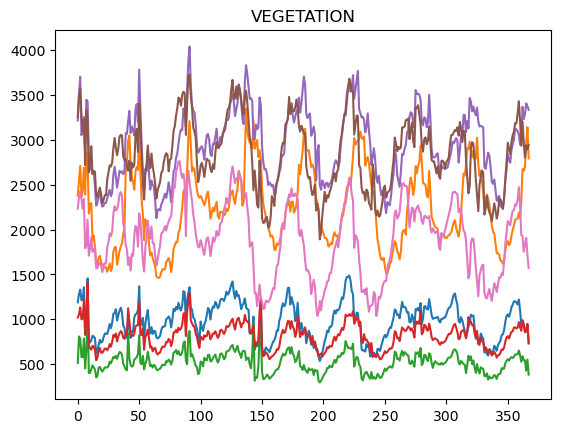

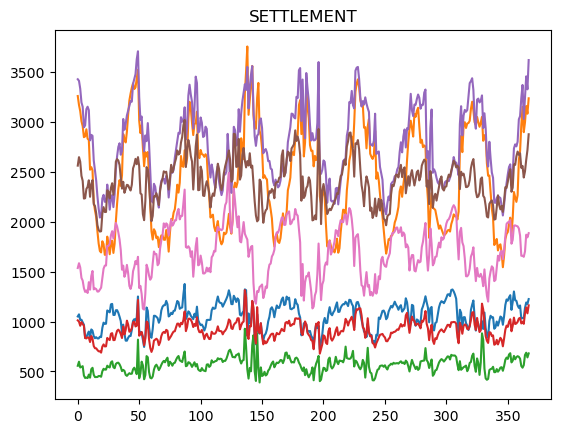

In [117]:
plot_mat(name="../Data/Gauteng_nochange.mat")

We now load the data into a multi-dimensional numpy array.


In [118]:
mat = scipy.io.loadmat("../Data/Gauteng_nochange.mat")
veg_gauteng = mat['veg_gauteng']
bwt_gauteng = mat['bwt_gauteng']

**MISSING ANSWER**


Please plot the data recorded at time-step 7 of 45 in the first year. Your result should look similar to the graph depicted below.


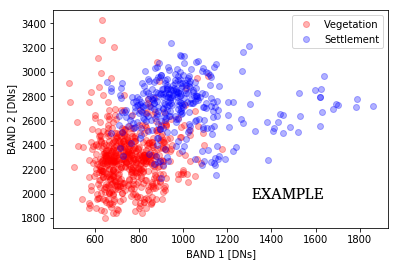

In [119]:
Image("./sample.png")

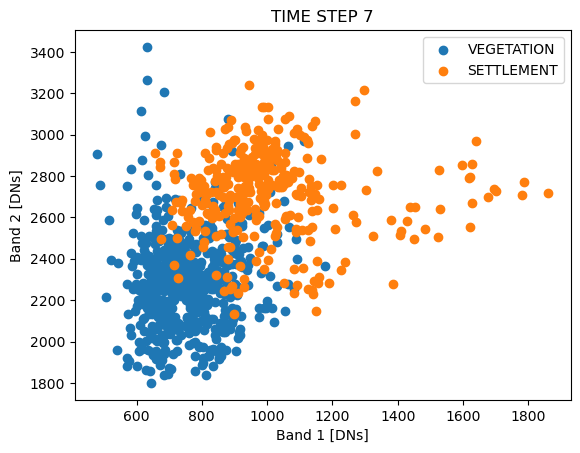

In [120]:
# (time,pixels,band)

def plot_time_step(timestep):
    band1 = veg_gauteng[timestep, :, 0]
    band2 = veg_gauteng[timestep, :, 1]
    
    plt.scatter(band1, band2, label="VEGETATION")
    
    band1_settlement = bwt_gauteng[timestep, :, 0]
    band2_settlement = bwt_gauteng[timestep, :, 1]
    
    plt.scatter(band1_settlement, band2_settlement, label="SETTLEMENT")
    
    plt.xlabel("Band 1 [DNs]")
    plt.ylabel("Band 2 [DNs]")
    plt.legend()
    plt.title("TIME STEP " + str(timestep))
    plt.show()

plot_time_step(7)

In [121]:
print(veg_gauteng.shape)
print(bwt_gauteng.shape)

(368, 592, 8)
(368, 333, 8)


**`MISSING CODE`**


Let's create our observation matrix $\mathbf{X}$ -- [samples, features] and our class labels $\mathbf{y}$.


In [122]:
X = np.concatenate((veg_gauteng,bwt_gauteng),axis=1)
X = np.transpose(X,(1,0,2))
print(X.shape)

yv = np.ones((592,1),dtype=int)
yb = np.zeros((333,1),dtype=int)
y = np.vstack((yv,yb))[:,0]
print(y.shape)

(925, 368, 8)
(925,)


Now that you have your data and you understand it it is time to complete Part B of the assignment. Please refer to the main assignment document for the details.


## Paper 1


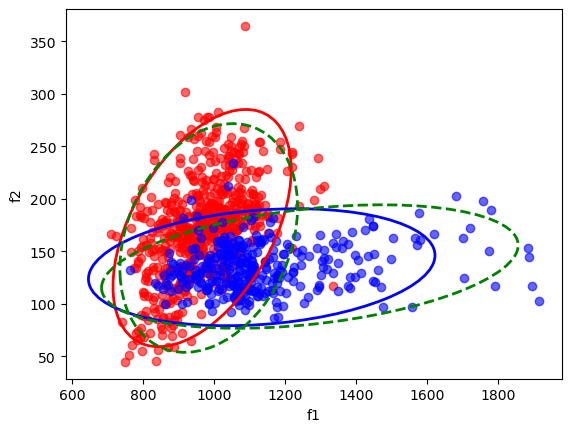

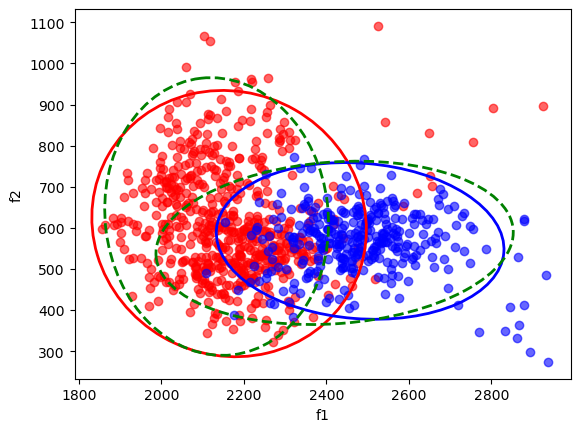

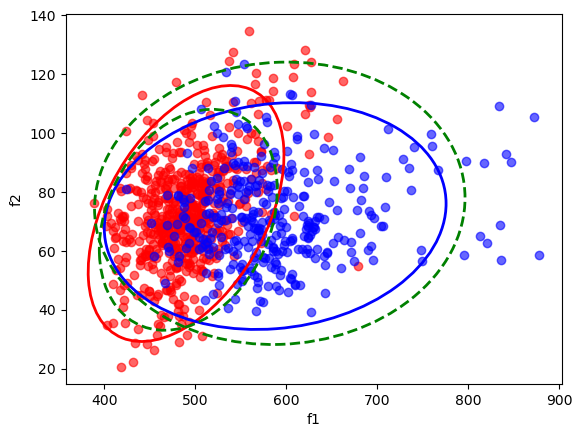

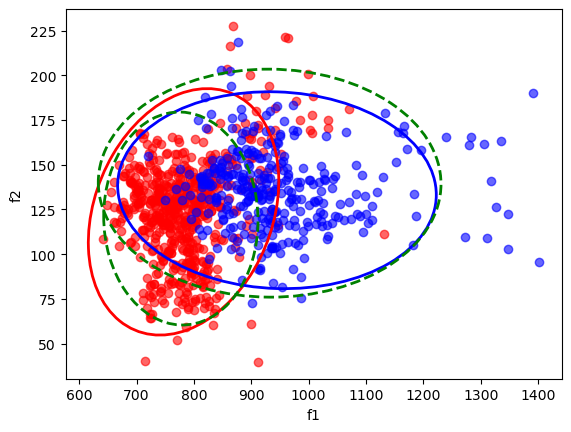

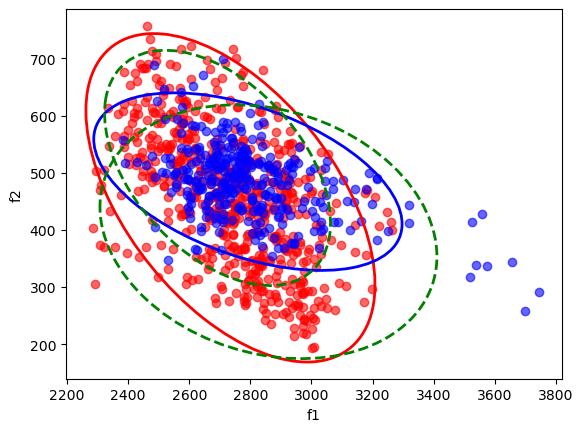

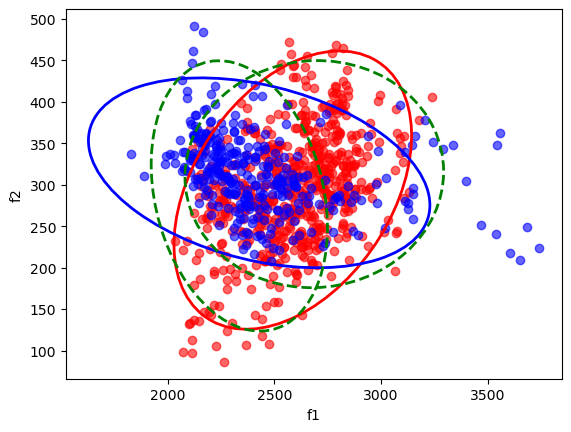

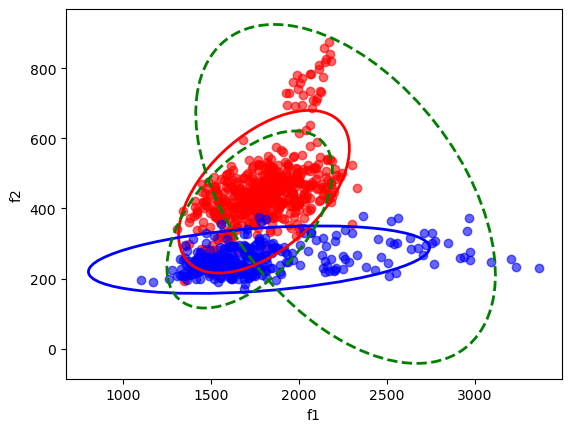

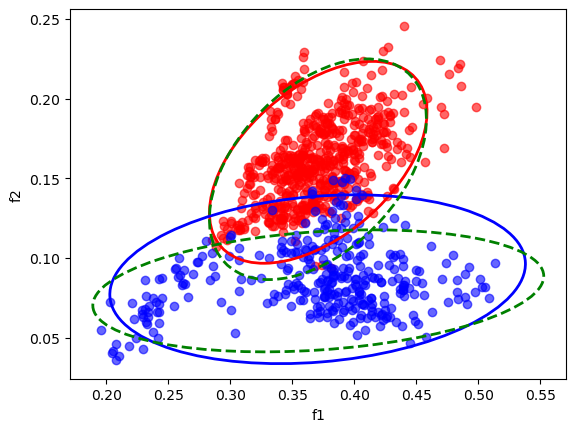

In [123]:
# Replicate Figure 2

from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from scipy.stats import chi2

harmonic_features = np.zeros((X.shape[0], 8, 2))

# Iterate over each observation
for i in range(X.shape[0]):
    for band in range(8):
        # Extract the time series for this observation and band, compute harmonic features
        time_series = X[i, :, band]
        
        fft_values = np.fft.fft(time_series) / len(time_series)
        fft_freq = np.fft.fftfreq(len(time_series))

        f1_idx = 0  # DC component (zero frequency)
        f2_idx = np.argmin(np.abs(fft_freq - 1/45))  # Closest to 1/45 Hz

        f1 = np.abs(fft_values[f1_idx])
        f2 = 2 * np.abs(fft_values[f2_idx])
        
        harmonic_features[i, band, 0] = f1
        harmonic_features[i, band, 1] = f2

# Function to plot the Gaussian or GMM confidence ellipse
def plot_confidence_ellipse(mean, cov, ax, color, label, confidence=0.95, linestyle='-'):
    # Chi-square value for the given confidence interval (95%)
    chi2_val = chi2.ppf(confidence, 2)
    eigvals, eigvecs = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * np.sqrt(eigvals * chi2_val)

    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, edgecolor=color, fc='None', lw=2, linestyle=linestyle, label=label)
    ax.add_patch(ellipse)

for band in range(8):
    fig, ax = plt.subplots()
    
    # Scatter plot for Vegetation and Settlement
    ax.scatter(harmonic_features[y == 1, band, 0], harmonic_features[y == 1, band, 1], label='Vegetation', alpha=0.6, color='red')
    ax.scatter(harmonic_features[y == 0, band, 0], harmonic_features[y == 0, band, 1], label='Settlement', alpha=0.6, color='blue')

    # Fit Gaussian densities for each class
    veg_data = harmonic_features[y == 1, band, :]
    sett_data = harmonic_features[y == 0, band, :]
    
    veg_mean = np.mean(veg_data, axis=0)
    veg_cov = np.cov(veg_data, rowvar=False)
    
    sett_mean = np.mean(sett_data, axis=0)
    sett_cov = np.cov(sett_data, rowvar=False)
    
    # Plot Gaussian confidence ellipses (solid line)
    plot_confidence_ellipse(veg_mean, veg_cov, ax, color='red', label='Vegetation Gaussian', linestyle='-')
    plot_confidence_ellipse(sett_mean, sett_cov, ax, color='blue', label='Settlement Gaussian', linestyle='-')
    
    # Fit GMM to combined (unlabelled) data
    combined_data = harmonic_features[:, band, :]
    gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=41).fit(combined_data)
    
    # Plot GMM confidence ellipses (dashed line for each component)
    for i in range(2):  # Iterate over the two GMM components
        plot_confidence_ellipse(gmm.means_[i], gmm.covariances_[i], ax, color='green', label=f'GMM Component {i+1}', linestyle='--')
    
    ax.set_xlabel('f1')
    ax.set_ylabel('f2')
    plt.show()


Overall Results:
Band 1: Logistic Regression Accuracy = 0.8186, Naive Bayes Accuracy = 0.8423
Band 2: Logistic Regression Accuracy = 0.8963, Naive Bayes Accuracy = 0.8963
Band 3: Logistic Regression Accuracy = 0.8445, Naive Bayes Accuracy = 0.8445
Band 4: Logistic Regression Accuracy = 0.8337, Naive Bayes Accuracy = 0.8337
Band 5: Logistic Regression Accuracy = 0.6523, Naive Bayes Accuracy = 0.6782
Band 6: Logistic Regression Accuracy = 0.7235, Naive Bayes Accuracy = 0.7862
Band 7: Logistic Regression Accuracy = 0.9525, Naive Bayes Accuracy = 0.9417
Band NDVI: Logistic Regression Accuracy = 0.9676, Naive Bayes Accuracy = 0.9482


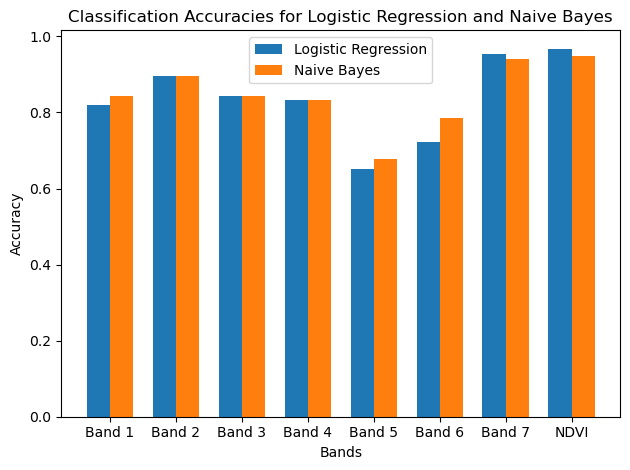

In [124]:
# Bar chart of classification accuracies

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

logistic_accuracies = []
naive_bayes_accuracies = []

# Iterate over each band (since harmonic_features has shape (n_samples, 8, 2))
for band in range(8):
    # Get the harmonic features for the current band
    X_band = harmonic_features[:, band, :] 
    y_band = y
    
    X_train, X_test, y_train, y_test = train_test_split(X_band, y_band, test_size=0.5, random_state=42)
    
    # Logistic Regression
    log_reg = LogisticRegression(random_state=42, C=1e5)
    log_reg.fit(X_train, y_train)
    y_pred_log_reg = log_reg.predict(X_test)
    log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
    logistic_accuracies.append(log_reg_acc)
    
    # Naive Bayes
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_test)
    nb_acc = accuracy_score(y_test, y_pred_nb)
    naive_bayes_accuracies.append(nb_acc)

print("\nOverall Results:")
for band in range(7):
    print(f"Band {band+1}: Logistic Regression Accuracy = {logistic_accuracies[band]:.4f}, Naive Bayes Accuracy = {naive_bayes_accuracies[band]:.4f}")
print(f"Band NDVI: Logistic Regression Accuracy = {logistic_accuracies[7]:.4f}, Naive Bayes Accuracy = {naive_bayes_accuracies[7]:.4f}")

# Plotting the bar chart
bands = np.arange(8)

bar_width = 0.35
fig, ax = plt.subplots()

# Bars for Logistic Regression and Naive Bayes
bar1 = ax.bar(bands - bar_width / 2, logistic_accuracies, bar_width, label='Logistic Regression')
bar2 = ax.bar(bands + bar_width / 2, naive_bayes_accuracies, bar_width, label='Naive Bayes')

# Labels and title
ax.set_xlabel('Bands')
ax.set_ylabel('Accuracy')
ax.set_title('Classification Accuracies for Logistic Regression and Naive Bayes')
ax.set_xticks(bands)
ax.set_xticklabels(['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5', 'Band 6', 'Band 7', 'NDVI'])
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


## Paper 2


In [125]:
# Fit GMMs for each time of year and each band

# Reduce X to the first 359 time steps (8 years)
X_reduced = X[:, :359, :]

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.5, random_state=42)

# Initialize lists to hold the GMMs for each time of year and each band (45 x 8 = 720 GMM's per class)
gmm_veg = [[None for _ in range(8)] for _ in range(45)]
gmm_sett = [[None for _ in range(8)] for _ in range(45)]

observations_per_year = 45
# Fit the GMMs for each time of year and each band
for time_of_year in range(observations_per_year):
    for band in range(8):
        # Extract the corresponding observations for each class
        veg_data = X_train[y_train == 1, time_of_year::observations_per_year, band].reshape(-1, 1)
        sett_data = X_train[y_train == 0, time_of_year::observations_per_year, band].reshape(-1, 1)
        
        # Fit the GMM for vegetation
        gmm_veg_time_band = GaussianMixture(n_components=1, covariance_type='full', random_state=42).fit(veg_data)
        gmm_veg[time_of_year][band] = gmm_veg_time_band
        
        # Fit the GMM for settlement
        gmm_sett_time_band = GaussianMixture(n_components=1, covariance_type='full', random_state=42).fit(sett_data)
        gmm_sett[time_of_year][band] = gmm_sett_time_band

In [95]:
# Perform SPRT on the test data

def sprt_test(pixel_data, gmm_veg, gmm_sett):
    llr_per_band = [[] for _ in range(8)]
    for time_of_year in range(observations_per_year):
        for band in range(8):
            # Get the GMMs for the current time of year and band
            gmm_veg_model = gmm_veg[time_of_year][band]
            gmm_sett_model = gmm_sett[time_of_year][band]
            
            # Get the observation for the current time of year and band
            observation = pixel_data[time_of_year, band].reshape(1, -1)
            
            # Calculate the log-likelihoods
            llr_veg = gmm_veg_model.score_samples(observation)[0]
            llr_sett = gmm_sett_model.score_samples(observation)[0]
            
            # Calculate the log-likelihood ratio
            llr_per_band[band].append(llr_veg - llr_sett)
    
    # Accumulate LLR over time for each band
    return [np.cumsum(llr) for llr in llr_per_band]

sprt_accuracies = []
for band in range(8):
    correct = 0
    total = 0
    
    for i, pixel_data in enumerate(X_test):
        llr_per_band = sprt_test(pixel_data, gmm_veg, gmm_sett)
        decision = 1 if llr_per_band[band][-1] > 0 else 0  # Final decision after accumulating LLR for the band
        if decision == y_test[i]:
            correct += 1
        total += 1
    
    # Compute accuracy for this band
    accuracy = correct / total
    sprt_accuracies.append(accuracy)

for band in range(8):
    print(f'Band {band} Accuracy: {sprt_accuracies[band]:.2f}')

Band 0 Accuracy: 0.76
Band 1 Accuracy: 0.95
Band 2 Accuracy: 0.81
Band 3 Accuracy: 0.83
Band 4 Accuracy: 0.64
Band 5 Accuracy: 0.60
Band 6 Accuracy: 0.75
Band 7 Accuracy: 0.66


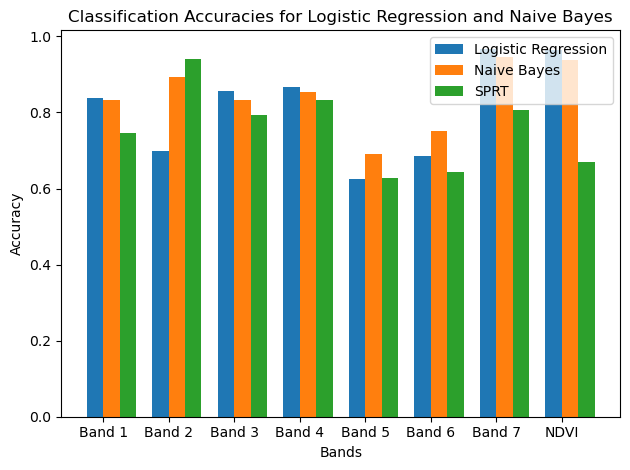

In [130]:
# Plotting the bar chart

bands = np.arange(8)
bar_width = 0.25
fig, ax = plt.subplots()

# Bars for Logistic Regression, Naive Bayes, SPRT
bar1 = ax.bar(bands - bar_width / 2, logistic_accuracies, bar_width, label='Logistic Regression')
bar2 = ax.bar(bands + bar_width / 2, naive_bayes_accuracies, bar_width, label='Naive Bayes')
bar3 = ax.bar(bands + bar_width * 3 / 2, sprt_accuracies, bar_width, label='SPRT')

# Labels and title
ax.set_xlabel('Bands')
ax.set_ylabel('Accuracy')
ax.set_title('Classification Accuracies for Logistic Regression and Naive Bayes')
ax.set_xticks(bands)
ax.set_xticklabels(['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5', 'Band 6', 'Band 7', 'NDVI'])
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()

In [128]:
# Repeat the experiment 20 times

import pandas as pd

# Placeholder to store accuracies for each band across 20 runs
logistic_accuracies_runs = []
naive_bayes_accuracies_runs = []
sprt_accuracies_runs = []

X_reduced = X[:, :359, :]

for run in range(20):
    random_state = np.random.randint(0, 10000)

    ## Logistic Regression and Naive Bayes

    logistic_accuracies = []
    naive_bayes_accuracies = []
    
    # Iterate over each band (since harmonic_features has shape (n_samples, 8, 2))
    for band in range(8):
        X_band = harmonic_features[:, band, :]
        y_band = y
        
        X_train, X_test, y_train, y_test = train_test_split(X_band, y_band, test_size=0.5, random_state=random_state)
        
        # Logistic Regression
        log_reg = LogisticRegression(random_state=42, C=1e5)
        log_reg.fit(X_train, y_train)
        y_pred_log_reg = log_reg.predict(X_test)
        log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
        logistic_accuracies.append(log_reg_acc)
        
        # Naive Bayes
        nb_model = GaussianNB()
        nb_model.fit(X_train, y_train)
        y_pred_nb = nb_model.predict(X_test)
        nb_acc = accuracy_score(y_test, y_pred_nb)
        naive_bayes_accuracies.append(nb_acc)
    
    # Store the accuracies for this run
    logistic_accuracies_runs.append(logistic_accuracies)
    naive_bayes_accuracies_runs.append(naive_bayes_accuracies)

    ## SPRT

    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.5, random_state=random_state)

    # Initialize lists to hold the GMMs for each time of year and each band (45 x 8 = 720 GMM's per class)
    gmm_veg = [[None for _ in range(8)] for _ in range(45)]
    gmm_sett = [[None for _ in range(8)] for _ in range(45)]

    observations_per_year = 45
    # Fit the GMMs for each time of year and each band
    for time_of_year in range(observations_per_year):
        for band in range(8):
            # Extract the corresponding observations for each class
            veg_data = X_train[y_train == 1, time_of_year::observations_per_year, band].reshape(-1, 1)
            sett_data = X_train[y_train == 0, time_of_year::observations_per_year, band].reshape(-1, 1)
            
            # Fit the GMM for vegetation
            gmm_veg_time_band = GaussianMixture(n_components=1, covariance_type='full', random_state=random_state).fit(veg_data)
            gmm_veg[time_of_year][band] = gmm_veg_time_band
            
            # Fit the GMM for settlement
            gmm_sett_time_band = GaussianMixture(n_components=1, covariance_type='full', random_state=random_state).fit(sett_data)
            gmm_sett[time_of_year][band] = gmm_sett_time_band

    sprt_accuracies = []
    for band in range(8):
        correct = 0
        total = 0
        
        for i, pixel_data in enumerate(X_test):
            llr_per_band = sprt_test(pixel_data, gmm_veg, gmm_sett)
            decision = 1 if llr_per_band[band][-1] > 0 else 0  # Final decision after accumulating LLR for the band
            if decision == y_test[i]:
                correct += 1
            total += 1
        
        # Compute accuracy for this band
        accuracy = correct / total
        sprt_accuracies.append(accuracy)
    
    sprt_accuracies_runs.append(sprt_accuracies)

# Convert lists to numpy arrays for easier calculation
logistic_accuracies_runs = np.array(logistic_accuracies_runs)
naive_bayes_accuracies_runs = np.array(naive_bayes_accuracies_runs)
sprt_accuracies_runs = np.array(sprt_accuracies_runs)

# Calculate the average and standard deviation for each band
logistic_accuracies_mean = np.mean(logistic_accuracies_runs, axis=0)
logistic_accuracies_std = np.std(logistic_accuracies_runs, axis=0)
naive_bayes_accuracies_mean = np.mean(naive_bayes_accuracies_runs, axis=0)
naive_bayes_accuracies_std = np.std(naive_bayes_accuracies_runs, axis=0)
sprt_accuracies_mean = np.mean(sprt_accuracies_runs, axis=0)
sprt_accuracies_std = np.std(sprt_accuracies_runs, axis=0)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Band': np.arange(8),
    'Logistic Regression Mean': logistic_accuracies_mean,
    'Logistic Regression Std': logistic_accuracies_std,
    'Naive Bayes Mean': naive_bayes_accuracies_mean,
    'Naive Bayes Std': naive_bayes_accuracies_std,
    'SPRT Mean': sprt_accuracies_mean,
    'SPRT Std': sprt_accuracies_std
})

results_df

,Band,Logistic Regression Mean,Logistic Regression Std,Naive Bayes Mean,Naive Bayes Std,SPRT Mean,SPRT Std
0,0,0.839849,0.012837,0.838013,0.010907,0.740173,0.016048
1,1,0.786393,0.108396,0.893413,0.009928,0.939093,0.011542
2,2,0.845896,0.013424,0.822246,0.015932,0.789957,0.013312
3,3,0.850216,0.012242,0.845464,0.014656,0.825378,0.013424
4,4,0.632937,0.011859,0.659503,0.014843,0.630994,0.015949
5,5,0.705832,0.021841,0.753780,0.012741,0.639741,0.018749
6,6,0.959827,0.008623,0.948380,0.006758,0.763175,0.031935
7,7,0.969330,0.005228,0.941577,0.007651,0.656371,0.033785
